# **Prediction Using Supervised ML - Task 1**

In [ ]:
# Importing all the libraries which are to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating a handle and printing the dataset

handle = pd.read_csv('http://bit.ly/w-data')
handle

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Hours is assigned to hrs and Scores is assigned to scr. Printing these values

hrs = handle['Hours'].values
scr = handle['Scores'].values

hrs,scr

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [ ]:
# Printing information about the handle

handle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Printing description elements of the handle

handle.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


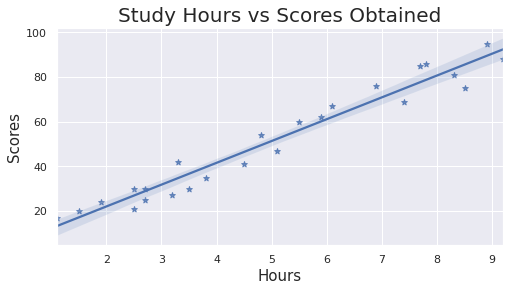

In [ ]:
# Displaying the Regression Line

plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Study Hours vs Scores Obtained',fontsize=20)
sns.regplot(data=handle,x='Hours',y='Scores',color='b',marker='*')

plt.show()

## **Construction of Model Linear Regression**

In [ ]:
# Importing all the libraries which are to be used

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train and test sets. Also, displaying their values

X_train,X_test,Y_train,Y_test = train_test_split(hrs,scr,random_state=0,test_size=0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((20,), (5,), (20,), (5,))

In [ ]:
# LinearRegression is assigned to linreg

linreg = LinearRegression()

In [ ]:
# hrs values are reshaped as we cannot use rank-1 matrix in scikit learn

X_train = X_train.reshape(20,1)
X_test = X_test.reshape(5,1)

In [ ]:
# Fit the train data

linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Slope is m and Intercept is c. Printing m and c

m = linreg.coef_
c = linreg.intercept_

print("Slope is",m ,"and Intercept is",c)

Slope is [9.91065648] and Intercept is 2.018160041434662


In [ ]:
# Values of y according to x_train data come out to be as follows:

yp = m*X_train + c
yp

array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

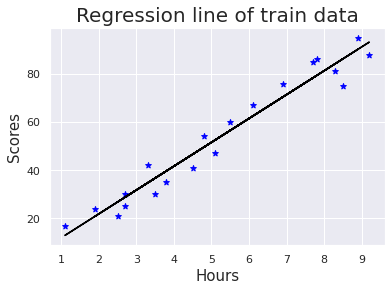

In [ ]:
# Regression line corresponding to train data

plt.scatter(X_train,Y_train,color='blue',marker='*')
plt.plot(X_train,yp,color='black')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Regression line of train data',fontsize=20)

plt.show()

In [ ]:
# End Objective: Predicting value of scr(Scores) corresponding to x_test

Y_pred = linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
# Displaying predicted and actual scores

Y_pred,Y_test

(array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328]),
 array([20, 27, 69, 30, 62]))

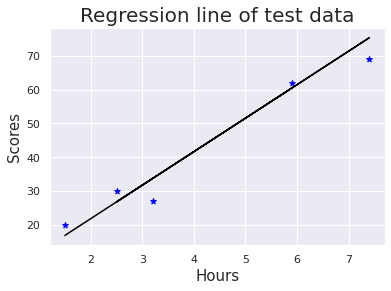

In [ ]:
# Regression line corresponding to test set of x and predicted values of y

plt.plot(X_test,Y_pred,color='black')
plt.scatter(X_test,Y_test,color='blue',marker='*')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Regression line of test data',fontsize=20)

plt.show()

In [ ]:
# Comparing actual and predicted scores and printing the compared data

handle_compare = pd.DataFrame({'Actual_Values':list(Y_test),'Predicted_Values':list(Y_pred)})
handle_compare

,Actual_Values,Predicted_Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# Computing R Square value to predict accuracy of model

from sklearn import metrics

Accuracy = metrics.r2_score(Y_test,Y_pred)
print("Accuracy of the model is : "+str(Accuracy*100))

Accuracy of the model is : 94.54906892105353


### **Accuracy of 94.55% indicates that our model is a good one**

In [ ]:
# Calculating Mean Square Error and its square root

from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_MSE = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

print("Mean Squared Error      =",MSE)
print("Root Mean Squared Error =",root_MSE)

Mean Squared Error      = 21.598769307217456
Root Mean Squared Error = 4.647447612100373


**Find the predicted score if a student studies 9.25 hours per day**

In [ ]:
Predicted_score = linreg.predict([[9.25]])
print("If a student studies for 9.25 hours per day then the predicted score is",Predicted_score)

If a student studies for 9.25 hours per day then the predicted score is [93.69173249]


**Result: If a student studies for 9.25 hours per day then the predicted score is 93.69%**

***TASK 1 Ends Here***